# Prediction Using Unsupervised ML  
<p><ul><li><i><b>Unsupervised Learning</b></i> is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses.<br>The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.<br>Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).</li>
<li><b><i>K-means clustering</i></b> is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).<br>The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.<br>The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.<br>Data points are clustered based on feature similarity. </li></ul></p>

## Task 2
<p><ul><li>From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.</li></ul></p>

### This is an ‘Iris’ [DataSets][1].
[1]: https://bit.ly/3kXTdox "DataSet"

### Performed by Ankita Sinha (sinhaankitasinha31@gmail.com)

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
%matplotlib inline

<h3><b>Importing iris dataset</b></h3>

In [2]:
data = pd.read_csv("Iris.csv")

<h3>Exporling DataSet</h3>

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.shape

(150, 6)

In [7]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<p>Count the <b>missing values</b> for each column in the dataset.</p>

In [8]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<p><b>The elbow method</b> is used to predict the optimum number of clusters. It allows us to pick the optimum amount of clusters for classification. Although we already know the answer is 3 it is still interesting to run.</p>

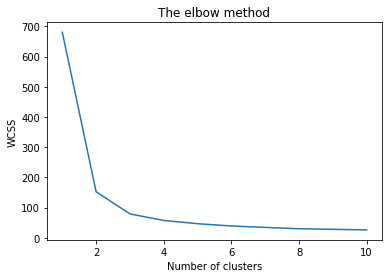

In [9]:
x = data.iloc[:, [1, 2, 3, 4]].values
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

<p>In the Elbow method the number of Cluster prediction is true. So this Technique indiactes a number of Clusters=3 <br>
    Now, Applying <b>Kmeans Clustering</b> on data</p>

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

<p>Now K-Means Classiffier is created.</p>
<h3>Visualising the Clusters</h3>

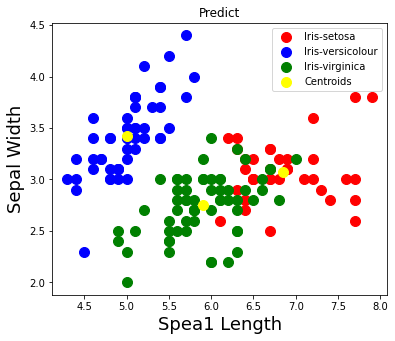

In [11]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(6,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.title('Predict')
plt.legend()

<h3>THANK YOU</h3>